In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import scipy.io as scio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
out_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'
parcellations = np.asarray([['network32', 'Network32', 32],
                            ['power', 'Power', 264], 
                            ['schaefer', 'Schaefer', 300]])
# out_path = out_dir+'\\'+ parcellations[0][0]+'\\' + parcellations[0][0]
parcellation ='network32'

In [4]:
top_dir = 'H:\Matlab\Work\Stroke15\Mutilayer\DFC'
parcellations = np.asarray([['network32', 'Network32', 32],
                            ['power', 'Power', 264], 
                            ['schaefer', 'Schaefer', 300]])
data_path = top_dir+'\\'+ parcellations[0][0]+'\\'


roi_label =[]
node_path = r'H:\Matlab\Software\conn\rois\networks.txt'
with open(node_path,"r") as file:
    for num,line in enumerate(file.readlines()):
#         a = line.split(' ')[0].split('\t')[-1].strip('\n')
    
        a = line.split(' ')[0]
        b = line.split(' ')[1]
        if b == "(L)" or b =="(R)":
#             print(a+b)
            roi_label.append(a+b)
        else:
            roi_label.append(a)
    file.close()
roi_lab_inx = np.array([1]*4+[2]*3+[3]*4+[4]*7+[5]*4+[6]*4+[7]*4+[8]*2)
roi_networks = ['DMN','DMN','DMN','DMN','SMN','SMN','SMN','VIS','VIS','VIS','VIS',"SAN","SAN","SAN","SAN","SAN","SAN","SAN","DAN","DAN","DAN"
          ,"DAN","FPN","FPN","FPN","FPN","LN","LN","LN","LN","CE","CE"]
roi_lab_df = pd.DataFrame({0:roi_lab_inx,1:roi_networks})

In [5]:
data_path

'H:\\Matlab\\Work\\Stroke15\\Mutilayer\\DFC\\network32\\'

In [6]:
node_felx1  = scio.loadmat(os.path.join(data_path,'node_flexibility_tr_50.mat'))
node_felx11 = node_felx1['nodeflex_rep_mean']

In [7]:
flex_matrix = node_felx11
flex_matrix.shape

(30, 32)

In [8]:
group_labels = ["Mild","Mild","Severe","Severe","Severe","Severe","Mild",
           "Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15

normalized_nodeflex_df = pd.DataFrame()
for i, sub in enumerate(group_labels):
        node_flex = pd.DataFrame()

        for l, roi in enumerate(roi_label):
            pre = pd.DataFrame([[str(i), sub, roi, flex_matrix[i][l]]], 
                               columns = ['Subject', 'Group', 'Roi', 'Flexibility']) 
#                 print(pre)
            if l == 0:
                node_flex = pre
            else:
                node_flex = pd.concat((node_flex,pre), axis=0)
#             print(node_flex)
            
        normalized_nodeflex_df = pd.concat((normalized_nodeflex_df, node_flex), axis=0)

#         print(normalized_nodeflex_df)
        
#         if i == 2:
#             break
# normalized_nodeflex_df.to_csv('./dfc_modules_result/network32_node_flex1_tidy_corrected.csv')    

In [9]:
 normalized_nodeflex_df

,Subject,Group,Roi,Flexibility
0,0,Mild,DefaultMode.MPFC,0.025133
0,0,Mild,DefaultMode.LP(L),0.040600
0,0,Mild,DefaultMode.LP(R),0.033667
0,0,Mild,DefaultMode.PCC,0.031933
0,0,Mild,SensoriMotor.Lateral(L),0.024067
...,...,...,...,...
0,29,Control,Language.IFG(R),0.014333
0,29,Control,Language.pSTG(L),0.029133
0,29,Control,Language.pSTG(R),0.031667
0,29,Control,Cerebellar.Anterior,0.021733


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import json
import os

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from numpy.ma import masked_array
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr
from functools import reduce

from bioinfokit.analys import stat
# ~~~~~~~~~~~~ define the stat model~~~~~~~~~~~~~~~~~~~
import scipy.stats as stats

In [11]:
nodeflex_groupbyfactor = normalized_nodeflex_df.groupby('Roi')
# inter_2test_df = Pd.DataFrame()
# nodeflex_2test_df ={}
# nodeflex_2test_df['Roi']  =[]
# nodeflex_2test_df['stat'] =[]
# nodeflex_2test_df['pval'] =[]

nodeflex_ftest_df ={}
nodeflex_ftest_df['roi'] =[]
nodeflex_ftest_df['fval'] =[]
nodeflex_ftest_df['pval'] =[]

nodeflex_post_2test_df ={}
nodeflex_post_2test_df['Sig_roi'] =[]
nodeflex_post_2test_df['mild2severe_stat'] =[]
nodeflex_post_2test_df['mild2severe_pval'] =[]
nodeflex_post_2test_df['severe2control_stat'] =[]
nodeflex_post_2test_df['severe2control_pval'] =[]
nodeflex_post_2test_df['mild2control_stat'] =[]
nodeflex_post_2test_df['mild2control_pval'] =[]



for factor, group in nodeflex_groupbyfactor:
#     print(group)
#     break
    mild = group[group['Group']=='Mild']
    severe = group[group['Group']=='Severe']
    control = group[group['Group']=='Control']
#     print( mild,control)
#     break
    fvalue, pvalue = stats.f_oneway(mild['Flexibility'],severe['Flexibility'],control['Flexibility'])
    nodeflex_ftest_df['roi'].append(factor)
    nodeflex_ftest_df['fval'].append(fvalue)
    nodeflex_ftest_df['pval'].append(pvalue)
    if pvalue < 0.05:
        nodeflex_post_2test_df['Sig_roi'].append(factor)
        
        mild_severe = pd.concat( (mild,severe),axis = 0)
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Flexibility",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
#         print(t1,p1)
#         print(s1.summary)
#         break
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Flexibility",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Flexibility",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        nodeflex_post_2test_df['mild2severe_stat'].append(float(t1))
        nodeflex_post_2test_df['mild2severe_pval'].append(float(p1))
        nodeflex_post_2test_df['severe2control_stat'].append(float(t2))
        nodeflex_post_2test_df['severe2control_pval'].append(float(p2))
        nodeflex_post_2test_df['mild2control_stat'].append(float(t3))
        nodeflex_post_2test_df['mild2control_pval'].append(float(p3))

In [68]:
# nodeflex_ftest_df
pd.DataFrame(nodeflex_ftest_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_flexibility_ftest.csv')

nodeflex_ftest_df['Label'] = list(np.argsort(roi_label)+1)
flex_ftest_df =pd.DataFrame(nodeflex_ftest_df)
print(flex_ftest_df)
sorted_flex_ftest_df = flex_ftest_df.sort_values('Label') 
sorted_flex_ftest_df.to_csv(f'{out_dir}\\{parcellation}\\tr_50_sorted_whole-brain_flexibility_ftest.csv')


In [71]:
sig_flex_ind = []

for i in nodeflex_post_2test_df['Sig_roi']:
    print(i,np.where(np.array(roi_label) == i))
    sig_flex_ind.append(np.where(np.array(roi_label) == i)[0][0]+1)
sig_flex_ind

Cerebellar.Anterior (array([30], dtype=int64),)
Salience.AInsula(R) (array([13], dtype=int64),)
Salience.RPFC(L) (array([14], dtype=int64),)


[31, 14, 15]

In [69]:
nodeflex_post_2test_df

{'Sig_roi': ['Cerebellar.Anterior', 'Salience.AInsula(R)', 'Salience.RPFC(L)'],
 'mild2severe_stat': [-1.07425, -2.30904, -2.64757],
 'mild2severe_pval': [0.302244, 0.0380152, 0.0201044],
 'severe2control_stat': [2.04142, -1.81212, -0.584086],
 'severe2control_pval': [0.0533831, 0.0836398, 0.565104],
 'mild2control_stat': [2.43298, 1.47828, 4.0779],
 'mild2control_pval': [0.0250241, 0.15572, 0.000641314]}

In [14]:
# plt.figure(figsize=(20, 6))
# sns.set_style("ticks")

nodeflex_groupbyfactor = normalized_nodeflex_df.groupby('Roi')
sig_roi_df = pd.DataFrame()
for factor, group in nodeflex_groupbyfactor:
    if factor in nodeflex_post_2test_df['Sig_roi']:
        print(factor,group)
        sig_roi_df = pd.concat((sig_roi_df,group), axis=0)
        

Cerebellar.Anterior   Subject    Group                  Roi  Flexibility
0       0     Mild  Cerebellar.Anterior     0.032400
0       1     Mild  Cerebellar.Anterior     0.006267
0       2   Severe  Cerebellar.Anterior     0.011800
0       3   Severe  Cerebellar.Anterior     0.019200
0       4   Severe  Cerebellar.Anterior     0.024067
0       5   Severe  Cerebellar.Anterior     0.020200
0       6     Mild  Cerebellar.Anterior     0.001133
0       7   Severe  Cerebellar.Anterior     0.011600
0       8   Severe  Cerebellar.Anterior     0.036133
0       9     Mild  Cerebellar.Anterior     0.010267
0      10   Severe  Cerebellar.Anterior     0.022133
0      11   Severe  Cerebellar.Anterior     0.016200
0      12     Mild  Cerebellar.Anterior     0.028200
0      13   Severe  Cerebellar.Anterior     0.016600
0      14     Mild  Cerebellar.Anterior     0.006667
0      15  Control  Cerebellar.Anterior     0.033600
0      16  Control  Cerebellar.Anterior     0.064933
0      17  Control  Cerebe

In [18]:
sig_roi_df = sig_roi_df.drop(['Subject'],axis = 1)

In [19]:
new_sig_roi_df = {}
new_sig_roi_df['Group'] = sig_roi_df['Group'].tolist()
new_sig_roi_df['ROI'] = sig_roi_df['Roi'].tolist()
new_sig_roi_df['Node Flexibility'] = sig_roi_df['Flexibility'].tolist()

In [20]:
new_sig_roi = pd.DataFrame(new_sig_roi_df)
new_sig_roi

,Group,ROI,Node Flexibility
0,Mild,Cerebellar.Anterior,0.032400
1,Mild,Cerebellar.Anterior,0.006267
2,Severe,Cerebellar.Anterior,0.011800
3,Severe,Cerebellar.Anterior,0.019200
4,Severe,Cerebellar.Anterior,0.024067
5,Severe,Cerebellar.Anterior,0.020200
6,Mild,Cerebellar.Anterior,0.001133
7,Severe,Cerebellar.Anterior,0.011600
8,Severe,Cerebellar.Anterior,0.036133
9,Mild,Cerebellar.Anterior,0.010267


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Salience.AInsula(R)_Severe v.s. Salience.AInsula(R)_Control: t-test independent samples with Bonferroni correction, P_val=7.528e-01 stat=1.812e+00
Salience.RPFC(L)_Mild v.s. Salience.RPFC(L)_Severe: t-test independent samples with Bonferroni correction, P_val=1.809e-01 stat=-2.648e+00
Salience.RPFC(L)_Severe v.s. Salience.RPFC(L)_Control: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.841e-01
Cerebellar.Anterior_Mild v.s. Cerebellar.Anterior_Severe: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.074e+00
Cerebellar.Anterior_Severe v.s. Cerebellar.Anterior_Control: t-test independent samples with Bonferroni correction, P_val=4.804e-01 stat=-2.041e+00
Salience.AInsula(R)_Mild v.s. Salience.AInsula(R)_Severe: t-test independent samples with Bonferroni correction, P_v

(<matplotlib.axes._subplots.AxesSubplot at 0x1dc36d15048>,
  <statannot.StatResult.StatResult at 0x1dc383eba08>])

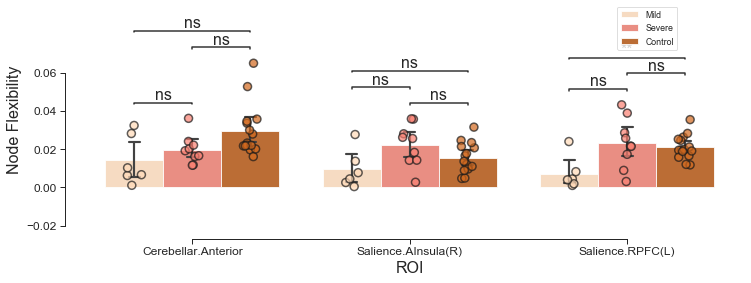

In [22]:
plt.figure(figsize=(12, 4))

sns.set_style("ticks")

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":30,"axes.labelsize":16}) 
sns.stripplot(x = "ROI", y="Node Flexibility", hue = 'Group',
              data = new_sig_roi,
#       color="whitesmoke", 
#       jitter = True,
#       palette=["gainsboro","gainsboro",'#ccccff'],
      palette=["peachpuff", "salmon", "chocolate"],
      dodge = True,
#               split=True,
      legend = False,
       size = 8,
      edgecolor = 'k',
      linewidth = 1.5,
      alpha = 0.7

     )
ax = sns.barplot(x="ROI", y="Node Flexibility", hue = 'Group',
              data = new_sig_roi,
            
    capsize=.05,
    palette=["peachpuff", "salmon", "chocolate"],
    #estimator= np.mean,
    #ci="sd",
    #errcolor="k",
    #palette='Set2',
    #hue="Patient_status", kind="bar",  palette=["silver", "salmon", "darkred"],
    #palette="Set2",
    )
sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(0.81, 1.02), loc=2, borderaxespad=0.)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

handles, labels = ax.get_legend_handles_labels()

pairs= [
    (("Cerebellar.Anterior","Mild"),("Cerebellar.Anterior","Severe")),\
    (("Cerebellar.Anterior","Severe"),("Cerebellar.Anterior","Control")),\
    (("Cerebellar.Anterior","Mild"),("Cerebellar.Anterior","Control")),\
    
    (("Salience.AInsula(R)","Mild"),("Salience.AInsula(R)","Severe")),\
    (("Salience.AInsula(R)","Severe"),("Salience.AInsula(R)","Control")),\
    (("Salience.AInsula(R)","Mild"),("Salience.AInsula(R)","Control")),\
    
    (("Salience.RPFC(L)","Mild"),("Salience.RPFC(L)","Severe")),\
    (("Salience.RPFC(L)","Severe"),("Salience.RPFC(L)","Control")),\
    (("Salience.RPFC(L)","Mild"),("Salience.RPFC(L)","Control")),\
    	

    ]
# # test = ttest_ind(permutations=5000)
add_stat_annotation(ax = ax,
                    box_pairs = pairs,
                    data = new_sig_roi ,
                    test='t-test_ind',
#                     perform_stat_test = False, 
#                     pvalues= [0.0180984,0.0089401,0.0107977],
                    line_offset_to_box = 0.08, line_offset = 0.01, line_height = 0.01, text_offset=0.08,
                    loc='inside', x="ROI", y="Node Flexibility", hue = 'Group',verbose=2)
# plt.savefig(f'{out_path}_nodeflexibiltiy2.png', dpi = 300, bbox_inches='tight')



In [23]:
nodeflex_post_2test_df

{'Sig_roi': ['Cerebellar.Anterior', 'Salience.AInsula(R)', 'Salience.RPFC(L)'],
 'mild2severe_stat': [-1.07425, -2.30904, -2.64757],
 'mild2severe_pval': [0.302244, 0.0380152, 0.0201044],
 'severe2control_stat': [2.04142, -1.81212, -0.584086],
 'severe2control_pval': [0.0533831, 0.0836398, 0.565104],
 'mild2control_stat': [2.43298, 1.47828, 4.0779],
 'mild2control_pval': [0.0250241, 0.15572, 0.000641314]}

In [75]:
sig_flex_ind = []

for i in nodeflex_post_2test_df['Sig_roi']:
    print(i,np.where(np.array(roi_label) == i))
    sig_flex_ind.append(np.where(np.array(roi_label) == i)[0][0]+1)
sig_flex_ind

nodeflex_post_2test_df['Label'] = sig_flex_ind
print( nodeflex_post_2test_df)
pd.DataFrame( nodeflex_post_2test_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_flexibility_posttest.csv')

Cerebellar.Anterior (array([30], dtype=int64),)
Salience.AInsula(R) (array([13], dtype=int64),)
Salience.RPFC(L) (array([14], dtype=int64),)
{'Sig_roi': ['Cerebellar.Anterior', 'Salience.AInsula(R)', 'Salience.RPFC(L)'], 'mild2severe_stat': [-1.07425, -2.30904, -2.64757], 'mild2severe_pval': [0.302244, 0.0380152, 0.0201044], 'severe2control_stat': [2.04142, -1.81212, -0.584086], 'severe2control_pval': [0.0533831, 0.0836398, 0.565104], 'mild2control_stat': [2.43298, 1.47828, 4.0779], 'mild2control_pval': [0.0250241, 0.15572, 0.000641314], 'Label': [31, 14, 15]}


## network flex

In [24]:
flex_matrix = node_felx11
flex_matrix.shape

(30, 32)

In [25]:
nets = ['DMN','SMN','VIS',"SAN","DAN","FPN","LN","CE"]
n_net = len(nets)
n_net
net_flex_matrx = np.zeros((30,n_net))
for i,net in enumerate(nets):
    print(i,net)
    roi_fileter = roi_lab_inx == i+1
    net_flex = np.mean(flex_matrix[:,roi_fileter],axis =1)
    net_flex_matrx[:,i] = net_flex
#     print(net_flex.shape)
#     break

0 DMN
1 SMN
2 VIS
3 SAN
4 DAN
5 FPN
6 LN
7 CE


In [80]:
f'{out_dir}\\{parcellation}\\whole-brain_network_normalized_mean_allegiance_50.npy'

'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer\\network32\\whole-brain_network_normalized_mean_allegiance_50.npy'

In [83]:
net_flex_matrx.shape
normalized_netflex_df.to_csv(f'{out_dir}\\{parcellation}\\network_flexibility_tr_50.csv')    

In [28]:
group_labels = ["Mild","Mild","Severe","Severe","Severe","Severe","Mild",
           "Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15

normalized_netflex_df = pd.DataFrame()
for i, sub in enumerate(group_labels):
        net_flex = pd.DataFrame()

        for l, net in enumerate(nets):
            pre = pd.DataFrame([[str(i), sub, net, net_flex_matrx[i][l]]], 
                               columns = ['Subject', 'Group', 'Nets', 'Flexibility']) 
#                 print(pre)
            if l == 0:
                net_flex = pre
            else:
                net_flex = pd.concat((net_flex,pre), axis=0)
#             print(node_flex)
            
        normalized_netflex_df = pd.concat((normalized_netflex_df, net_flex), axis=0)

#         print(normalized_nodeflex_df)
        
#         if i == 2:
#             break
# normalized_nodeflex_df.to_csv('./dfc_modules_result/network32_node_flex1_tidy_corrected.csv')    

In [30]:
netflex_groupbyfactor = normalized_netflex_df.groupby('Nets')
# inter_2test_df = Pd.DataFrame()
# nodeflex_2test_df ={}
# nodeflex_2test_df['Roi']  =[]
# nodeflex_2test_df['stat'] =[]
# nodeflex_2test_df['pval'] =[]

netflex_ftest_df ={}
netflex_ftest_df['net'] =[]
netflex_ftest_df['fval'] =[]
netflex_ftest_df['pval'] =[]

netflex_post_2test_df ={}
netflex_post_2test_df['Sig_net'] =[]
netflex_post_2test_df['mild2severe_stat'] =[]
netflex_post_2test_df['mild2severe_pval'] =[]
netflex_post_2test_df['severe2control_stat'] =[]
netflex_post_2test_df['severe2control_pval'] =[]
netflex_post_2test_df['mild2control_stat'] =[]
netflex_post_2test_df['mild2control_pval'] =[]



for factor, group in netflex_groupbyfactor:
#     print(group)
#     break
    mild = group[group['Group']=='Mild']
    severe = group[group['Group']=='Severe']
    control = group[group['Group']=='Control']
#     print( mild,control)
#     break
    fvalue, pvalue = stats.f_oneway(mild['Flexibility'],severe['Flexibility'],control['Flexibility'])
    netflex_ftest_df['net'].append(factor)
    netflex_ftest_df['fval'].append(fvalue)
    netflex_ftest_df['pval'].append(pvalue)
    
#     break
    if pvalue < 0.05:
        netflex_post_2test_df['Sig_net'].append(factor)
        
        mild_severe = pd.concat( (mild,severe),axis = 0)
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Flexibility",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
#         print(t1,p1)
#         print(s1.summary)
#         break
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Flexibility",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Flexibility",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        netflex_post_2test_df['mild2severe_stat'].append(float(t1))
        netflex_post_2test_df['mild2severe_pval'].append(float(p1))
        netflex_post_2test_df['severe2control_stat'].append(float(t2))
        netflex_post_2test_df['severe2control_pval'].append(float(p2))
        netflex_post_2test_df['mild2control_stat'].append(float(t3))
        netflex_post_2test_df['mild2control_pval'].append(float(p3))

In [77]:
print(netflex_ftest_df)
netflex_post_2test_df

{'net': ['CE', 'DAN', 'DMN', 'FPN', 'LN', 'SAN', 'SMN', 'VIS'], 'fval': [4.623203873110816, 0.9686125276970666, 0.11885942355910233, 3.0514794043318307, 0.07135900915550632, 4.509948501589376, 0.9311058309755069, 0.012545403293288801], 'pval': [0.01876435751691703, 0.3924125691364661, 0.8883946299680429, 0.06385704715974481, 0.9313025563533824, 0.020421494249902257, 0.4064069422022453, 0.9875387151614167]}


{'Sig_net': ['CE', 'SAN'],
 'mild2severe_stat': [-1.26605, -2.4095],
 'mild2severe_pval': [0.227711, 0.031519],
 'severe2control_stat': [1.80775, -1.5631],
 'severe2control_pval': [0.0843396, 0.1323],
 'mild2control_stat': [2.84856, 2.27142],
 'mild2control_pval': [0.0102745, 0.0349358]}

In [32]:
netflex_groupbyfactor = normalized_netflex_df.groupby('Nets')
sig_net_df = pd.DataFrame()
for factor, group in netflex_groupbyfactor:
    if factor in netflex_post_2test_df['Sig_net']:
#         print(factor,group)
        sig_net_df = pd.concat((sig_net_df,group), axis=0)

In [1]:
# new_sig_net_df = {}
# new_sig_net_df['Group'] = sig_net_df['Group'].tolist()
# new_sig_net_df['Nets'] = sig_net_df['Nets'].tolist()
# new_sig_net_df['Net Flexibility'] = sig_net_df['Flexibility'].tolist()

# new_sig_net = pd.DataFrame(new_sig_net_df)
# new_sig_net

In [2]:
plt.figure(figsize=(8, 4))

sns.set_style("ticks")

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":30,"axes.labelsize":16}) 
sns.stripplot(x = "Nets", y= "Net Flexibility",
              hue = 'Group',
              data = new_sig_net_df,
#       color="whitesmoke", 
#       jitter = True,
#       palette=["gainsboro","gainsboro",'#ccccff'],
      palette=["peachpuff", "salmon", "chocolate"],
      dodge = True,
#               split=True,
      legend = False,
       size = 8,
      edgecolor = 'k',
      linewidth = 1.5,
      alpha = 0.7

     )
ax = sns.boxplot(x="Nets", y="Net Flexibility",
                 hue = 'Group',
              data = new_sig_net_df ,
            
#     capsize=.05,
    palette=["peachpuff", "salmon", "chocolate"],
    #estimator= np.mean,
    #ci="sd",
    #errcolor="k",
    #palette='Set2',
    #hue="Patient_status", kind="bar",  palette=["silver", "salmon", "darkred"],
    #palette="Set2",
                 whis = 1.5,
                 width = 0.9
    )
sns.despine(offset=10, trim=True)

plt.legend(bbox_to_anchor=(0.81, 1.02), loc=2, borderaxespad=0.)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# handles, labels = ax.get_legend_handles_labels()

pairs= [
    (("CE","Mild"),("CE","Severe")),\
    (("CE","Severe"),("CE","Control")),\
    (("CE","Mild"),("CE","Control")),\
    
    (("SAN","Mild"),("SAN","Severe")),\
    (("SAN","Severe"),("SAN","Control")),\
    (("SAN","Mild"),("SAN","Control")),\
    ]
# # test = ttest_ind(permutations=5000)
add_stat_annotation(ax = ax,
                    box_pairs = pairs,
                    test='t-test_ind',
#                     perform_stat_test = False, 
#                     pvalues= [3.489e-02,2.456e-02],
                    line_offset_to_box = 0.08, line_offset = 0.01, line_height = 0.01, text_offset=0.08,
                    loc='inside',x="Nets", y= "Net Flexibility",
                    hue = 'Group',
                    data = new_sig_net_df,verbose=2)
# plt.savefig(f'{out_path}_netflexibiltiy_tr_50.png', dpi = 300, bbox_inches='tight')
